In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

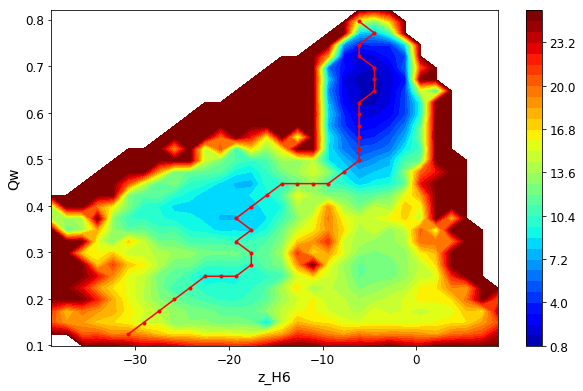

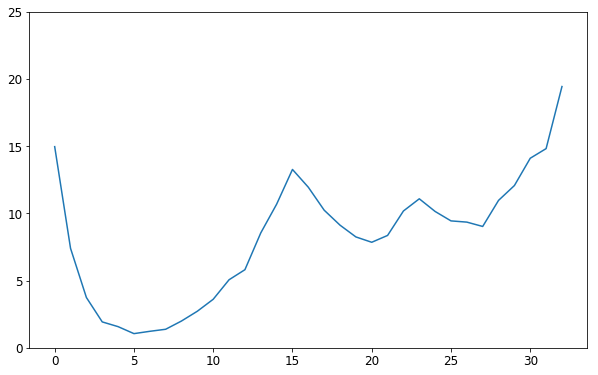

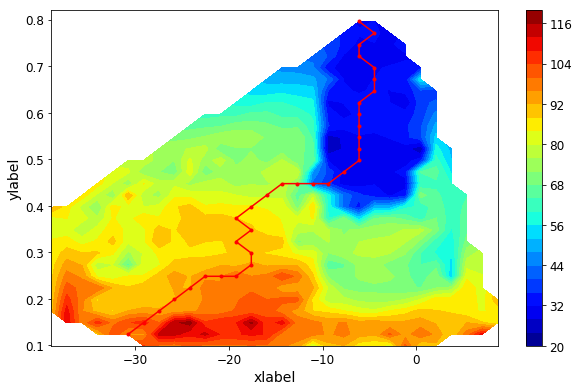

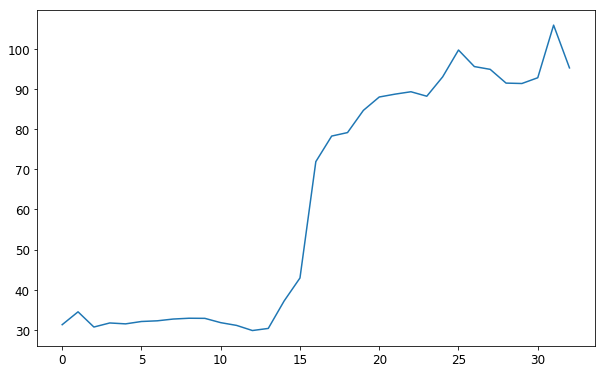

In [2]:
pre = "/Users/weilu/Research/server/may_2018/02_week"
temp = 370
location = pre + "/second_2/_280-350/2d_z_qw/more_temp_force_0.05/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 5), end=(28,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=25,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [4]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/03_week/all_data_folder/second_start_extended_combined_may19.feather")

In [5]:
data.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6'],
      dtype='object')

In [7]:
t = data.query("TempT != 417 and DisReal > 51 \
           and DisReal < 68 and z_average < -2 and z_average > -4")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1432d358>]], dtype=object)

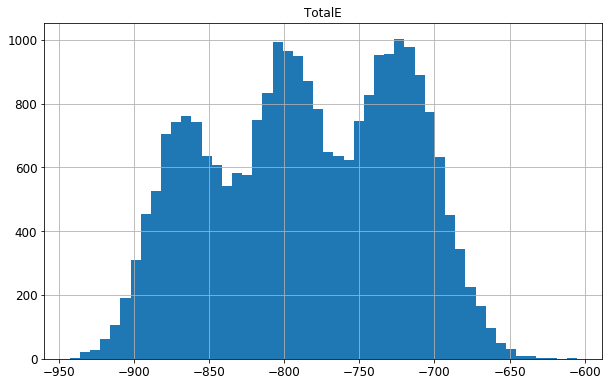

In [11]:
t.hist("TotalE", bins=50)

In [12]:
t373 = data.query("TempT == 373 and DisReal > 51 \
           and DisReal < 68 and z_average < -2 and z_average > -4")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a156cff28>]], dtype=object)

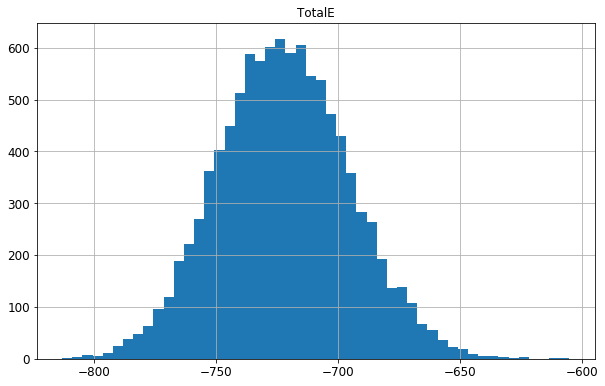

In [13]:
t373.hist("TotalE", bins=50)

In [15]:
t373

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
683666,3666,-170.450419,-426.749452,-235.291257,-297.031401,86.0,66.984802,26.133804,-39.436887,-715.953161,...,0.510668,1.600425,7.054080,-2.141146,-0.275552,-8.066415,-2.264832,-10.130897,-9.291176,-4.932951
684326,4326,-177.830578,-437.095771,-250.255853,-310.425441,86.0,67.927314,28.206607,-58.291045,-752.707089,...,2.076313,0.766066,7.543538,-3.534378,-0.414694,-5.504533,-4.430456,-10.213407,-8.030043,-6.049624
684330,4330,-185.264909,-434.855060,-254.481381,-313.882888,86.0,67.692650,28.237313,-51.793680,-743.575607,...,1.143671,1.136720,6.916791,-3.267389,0.038196,-6.386296,-3.173838,-10.119278,-7.057542,-5.645009
688923,8923,-188.031809,-433.216782,-249.620918,-305.952034,86.0,67.950152,27.687927,54.166484,-717.113728,...,0.921510,1.377567,6.479207,-2.449509,-2.310806,-8.747525,-5.618711,-9.892821,-4.092180,-4.614485
690143,10143,-203.623358,-408.405636,-270.367668,-313.335235,84.0,67.119372,27.999139,34.053782,-722.537375,...,1.311176,0.700131,6.935438,-2.112809,-4.426102,-6.360286,-7.488653,-7.171176,-1.713591,-2.644560
690187,10187,-196.694107,-395.838629,-259.103678,-298.971933,84.0,67.249843,28.906046,30.326481,-732.319765,...,0.823739,2.548891,9.655645,-3.971289,-2.323356,-5.493258,-9.154800,-9.010023,-9.567622,-4.175318
690215,10215,-189.884258,-390.229503,-253.331122,-295.814486,84.0,66.636813,28.726918,31.118911,-698.209069,...,2.078272,1.139085,6.867146,-3.233827,-2.580547,-9.281420,-7.114008,-10.265433,-4.467263,-8.318917
690247,10247,-207.487671,-410.062247,-270.181090,-314.963140,84.0,67.434216,26.452319,58.263686,-722.901476,...,0.524122,2.147875,7.033570,-2.947362,-2.469420,-7.417028,-8.604677,-8.501572,-11.267398,-3.011443
690251,10251,-200.044196,-412.017669,-258.825723,-302.971606,84.0,67.328121,23.293007,58.729641,-738.542959,...,0.725470,1.200791,7.157979,-3.270683,-1.854471,-8.789081,-7.238313,-9.534223,-8.479708,-5.898138
690255,10255,-196.903302,-403.606134,-261.275220,-305.041185,84.0,66.597537,24.920610,61.220220,-735.861539,...,0.667843,1.342072,7.731316,-2.605524,-1.176631,-6.557001,-7.485386,-8.649971,-4.993786,-6.134283


In [16]:
select(t373)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
58.0   0     164.0  58.959353  4.383157  51.355846  55.218969  58.884139   
       2     179.0  58.896697  4.020753  51.051358  55.189069  59.006478   
       3     116.0  57.058870  4.000349  51.008300  53.677881  56.968076   
60.0   0     247.0  58.921311  4.381339  51.086533  55.835819  58.771662   
       1     235.0  58.307482  4.081437  51.057232  54.888686  58.505485   
62.0   0     301.0  59.884104  4.317887  51.135551  56.654802  59.827492   
       1     337.0  60.372263  4.030364  51.328884  57.406279  60.314684   
       2     122.0  58.825727  4.286660  51.440458  55.248349  58.379409   
64.0   3     919.0  60.938503  4.148961  51.134149  58.118766  61.309105   
       5     548.0  61.341829  4.033957  51.099927  58.396224  61.686396   
66.0   2    1000.0  61.117293  3.885831  51.014952  58.440880  61.301114   
       3     817.0  61.555133  3.881837  51.100628  59.046084  61.875465   
       5     315.0  60.927723  3.886924  51.380712  57.989457  61.260867   
68.0   1     618.0  62.941671  3.577061  51.749130  60.422742  63.820359   
       2     360.0  62.709692  3.637080  51.117616  60.306652  63.318171   
       5     266.0  63.118088  3.512747  52.771601  60.618468  64.137759   
70.0   1     190.0  63.187152  3.607405  52.241291  60.502627  64.044288   
       2     185.0  63.542112  3.309253  53.391605  61.866484  63.990347   
       5     628.0  63.849886  3.122292  51.826737  62.030705  64.432112   
72.0   0     252.0  64.117716  3.363203  52.665611  62.512478  64.929230   
       2     244.0  63.958771  3.169318  52.539484  62.312326  64.657964   
       3     149.0  63.357248  3.810560  51.357889  61.708642  64.146320   
       4     133.0  63.995667  3.300765  52.265336  62.308285  65.138471   
74.0   2     179.0  64.269876  2.871412  55.788808  63.163288  65.038223   
       7     215.0  64.799677  2.714039  54.839356  63.215404  65.608561   
76.0   0     367.0  64.604183  2.566398  53.718974  63.180710  65.057184   
       4     105.0  64.869686  2.600159  55.287647  63.568517  65.393527   

                  75%        max  
BiasTo Run                        
58.0   0    62.420320  67.677721  
       2    61.734849  67.877750  
       3    59.529415  66.651877  
60.0   0    62.687725  67.731834  
       1    61.022229  67.051867  
62.0   0    63.185373  67.970691  
       1    63.725682  67.978842  
       2    62.176576  67.405243  
64.0   3    64.278665  67.979501  
       5    64.590414  67.965499  
66.0   2    64.181268  67.938474  
       3    64.619151  67.976028  
       5    64.136502  67.882567  
68.0   1    65.968065  67.977633  
       2    65.434900  67.986133  
       5    65.909719  67.872947  
70.0   1    66.126573  67.998812  
       2    66.363856  67.980271  
       5    66.274656  67.988242  
72.0   0    66.885838  67.967183  
       2    66.388173  67.975302  
       3    66.265454  67.996480  
       4    66.360343  67.798774  
74.0   2    66.594729  67.897062  
       7    66.926641  67.988947  
76.0   0    66.633061  67.981778  
       4    66.794506  67.945785

In [24]:
np.arange(8) // 2

array([0, 0, 1, 1, 2, 2, 3, 3])

In [25]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [26]:
t373_narrow = data.query("TempT == 373 and DisReal > 58 \
           and DisReal < 65 and z_average < -2.5 and z_average > -3.5")

In [27]:
t373_narrow

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
690879,10879,-188.979138,-390.081625,-249.115825,-289.262546,84.0,63.661735,20.669687,17.378090,-701.147517,...,0.650621,0.843067,4.545966,-3.066561,-1.748113,-6.430219,-8.190092,-9.252894,-8.895051,-6.098870
690899,10899,-183.186433,-392.944653,-248.231963,-290.903219,84.0,62.765665,20.238180,4.321019,-722.852166,...,2.083610,1.751864,8.232831,-2.584027,-0.334311,-4.870930,-4.314226,-7.357321,-12.419326,-3.192265
690951,10951,-198.371330,-418.571828,-262.922682,-306.794288,84.0,63.962096,24.762010,2.996987,-701.801432,...,1.135109,1.204688,6.678409,-3.242610,-3.586887,-8.136387,-6.533465,-8.381541,-7.687451,-5.183540
690963,10963,-203.890243,-410.824289,-263.026350,-303.628052,84.0,62.684794,26.680936,8.449340,-726.347395,...,1.423125,1.197325,6.840901,-3.244232,-5.257919,-7.654789,-8.554059,-9.237917,-2.725016,-2.810763
690983,10983,-204.946719,-424.061741,-266.330756,-309.658773,84.0,64.637249,24.843682,23.029081,-695.724410,...,1.021736,2.023428,8.815642,-3.377480,-4.444977,-7.599188,-7.986603,-8.800486,-7.926119,-5.178974
698563,18563,-200.476719,-406.283196,-254.381890,-298.644399,84.0,63.655067,21.874139,-20.290518,-743.007050,...,0.734103,1.320845,6.492530,-3.407151,0.666020,-5.851761,-11.573996,-11.560990,-7.626134,-7.147509
700136,20136,-198.617280,-403.437657,-256.952363,-302.751807,76.0,62.154514,20.276552,57.604418,-671.685930,...,0.825889,1.288798,6.359311,-2.564478,-2.033408,-8.763024,-8.968270,-9.715095,-2.393667,-4.623440
700168,20168,-204.006668,-404.623421,-266.981801,-310.144555,76.0,61.471915,22.424513,47.543739,-705.466515,...,1.003719,0.931413,7.588703,-2.781509,-3.820230,-8.485840,-9.287819,-9.172349,-3.685424,-3.974061
700212,20212,-201.402359,-399.899319,-257.784101,-299.495533,76.0,60.809113,24.815046,60.198799,-670.265642,...,0.710009,1.259152,5.545050,-2.753711,-3.074379,-9.317066,-7.355665,-8.175493,-4.717142,-3.300249
700276,20276,-205.320118,-413.030582,-267.203097,-306.812533,76.0,61.589629,15.407709,61.199536,-707.336586,...,0.799255,0.998693,6.362230,-2.644398,-2.460090,-9.528058,-5.657994,-6.338014,-6.228574,-2.725754


In [47]:
t373_narrow.to_csv("/Users/weilu/Research/data/t373_narrow.csv")

In [49]:
pd.read_csv("/Users/weilu/Research/data/t373_narrow.csv", index_col=0)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
690879,10879,-188.979138,-390.081625,-249.115825,-289.262546,84.0,63.661735,20.669687,17.378090,-701.147517,...,0.650621,0.843067,4.545966,-3.066561,-1.748113,-6.430219,-8.190092,-9.252894,-8.895051,-6.098870
690899,10899,-183.186433,-392.944653,-248.231963,-290.903219,84.0,62.765665,20.238180,4.321019,-722.852166,...,2.083610,1.751864,8.232831,-2.584027,-0.334311,-4.870930,-4.314226,-7.357321,-12.419326,-3.192265
690951,10951,-198.371330,-418.571828,-262.922682,-306.794288,84.0,63.962096,24.762010,2.996987,-701.801432,...,1.135109,1.204688,6.678409,-3.242610,-3.586887,-8.136387,-6.533465,-8.381541,-7.687451,-5.183540
690963,10963,-203.890243,-410.824289,-263.026350,-303.628052,84.0,62.684794,26.680936,8.449340,-726.347395,...,1.423125,1.197325,6.840901,-3.244232,-5.257919,-7.654789,-8.554059,-9.237917,-2.725016,-2.810763
690983,10983,-204.946719,-424.061741,-266.330756,-309.658773,84.0,64.637249,24.843682,23.029081,-695.724410,...,1.021736,2.023428,8.815642,-3.377480,-4.444977,-7.599188,-7.986603,-8.800486,-7.926119,-5.178974
698563,18563,-200.476719,-406.283196,-254.381890,-298.644399,84.0,63.655067,21.874139,-20.290518,-743.007050,...,0.734103,1.320845,6.492530,-3.407151,0.666020,-5.851761,-11.573996,-11.560990,-7.626134,-7.147509
700136,20136,-198.617280,-403.437657,-256.952363,-302.751807,76.0,62.154514,20.276552,57.604418,-671.685930,...,0.825889,1.288798,6.359311,-2.564478,-2.033408,-8.763024,-8.968270,-9.715095,-2.393667,-4.623440
700168,20168,-204.006668,-404.623421,-266.981801,-310.144555,76.0,61.471915,22.424513,47.543739,-705.466515,...,1.003719,0.931413,7.588703,-2.781509,-3.820230,-8.485840,-9.287819,-9.172349,-3.685424,-3.974061
700212,20212,-201.402359,-399.899319,-257.784101,-299.495533,76.0,60.809113,24.815046,60.198799,-670.265642,...,0.710009,1.259152,5.545050,-2.753711,-3.074379,-9.317066,-7.355665,-8.175493,-4.717142,-3.300249
700276,20276,-205.320118,-413.030582,-267.203097,-306.812533,76.0,61.589629,15.407709,61.199536,-707.336586,...,0.799255,0.998693,6.362230,-2.644398,-2.460090,-9.528058,-5.657994,-6.338014,-6.228574,-2.725754


In [50]:
t373_super_narrow = data.query("TempT == 373 and DisReal > 60 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5")

In [62]:
t373_super_narrow.drop("level_0", axis=1).reset_index(drop=True).reset_index()

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
0,0,-183.186433,-392.944653,-248.231963,-290.903219,84.0,62.765665,20.238180,4.321019,-722.852166,...,2.083610,1.751864,8.232831,-2.584027,-0.334311,-4.870930,-4.314226,-7.357321,-12.419326,-3.192265
1,1,-203.890243,-410.824289,-263.026350,-303.628052,84.0,62.684794,26.680936,8.449340,-726.347395,...,1.423125,1.197325,6.840901,-3.244232,-5.257919,-7.654789,-8.554059,-9.237917,-2.725016,-2.810763
2,2,-198.617280,-403.437657,-256.952363,-302.751807,76.0,62.154514,20.276552,57.604418,-671.685930,...,0.825889,1.288798,6.359311,-2.564478,-2.033408,-8.763024,-8.968270,-9.715095,-2.393667,-4.623440
3,3,-204.006668,-404.623421,-266.981801,-310.144555,76.0,61.471915,22.424513,47.543739,-705.466515,...,1.003719,0.931413,7.588703,-2.781509,-3.820230,-8.485840,-9.287819,-9.172349,-3.685424,-3.974061
4,4,-201.402359,-399.899319,-257.784101,-299.495533,76.0,60.809113,24.815046,60.198799,-670.265642,...,0.710009,1.259152,5.545050,-2.753711,-3.074379,-9.317066,-7.355665,-8.175493,-4.717142,-3.300249
5,5,-205.320118,-413.030582,-267.203097,-306.812533,76.0,61.589629,15.407709,61.199536,-707.336586,...,0.799255,0.998693,6.362230,-2.644398,-2.460090,-9.528058,-5.657994,-6.338014,-6.228574,-2.725754
6,6,-178.281697,-376.366721,-237.920124,-282.115608,76.0,62.458367,21.742777,60.658867,-678.643748,...,0.892182,2.258068,8.675508,-2.931965,-1.060059,-9.247739,-11.683983,-10.090947,-6.260215,-1.603898
7,7,-186.817382,-384.768943,-249.155596,-285.446440,76.0,62.912696,25.874808,62.743467,-704.606274,...,0.765338,0.958489,6.955008,-2.730942,-2.162102,-6.211948,-8.597890,-8.595427,-5.751583,-4.693169
8,8,-199.724862,-407.073971,-264.479602,-304.586851,76.0,62.061784,20.991611,61.964846,-731.888874,...,1.204239,0.657606,6.559105,-3.050972,-4.354171,-8.348043,-8.444871,-7.364612,-3.183824,-3.659724
9,9,-203.031963,-409.457162,-263.489526,-305.137466,76.0,60.114533,25.969850,57.396877,-748.906300,...,1.145960,1.643953,6.771216,-2.769939,-3.430384,-9.706465,-8.892401,-7.016079,1.900854,-3.852103


In [64]:
t373_super_narrow.to_csv("/Users/weilu/Research/data/t373_super_narrow.csv")

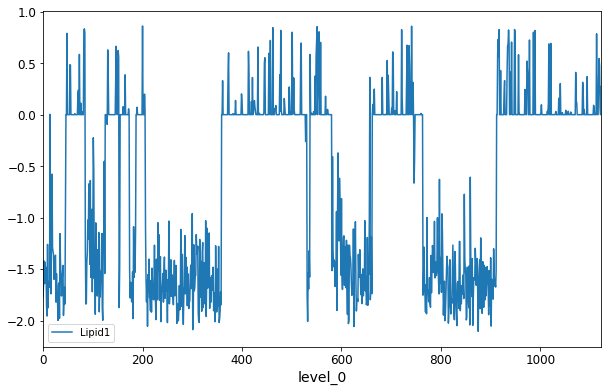

In [63]:
t373_super_narrow.drop("level_0", axis=1).reset_index(drop=True).reset_index().plot("level_0","Lipid1")

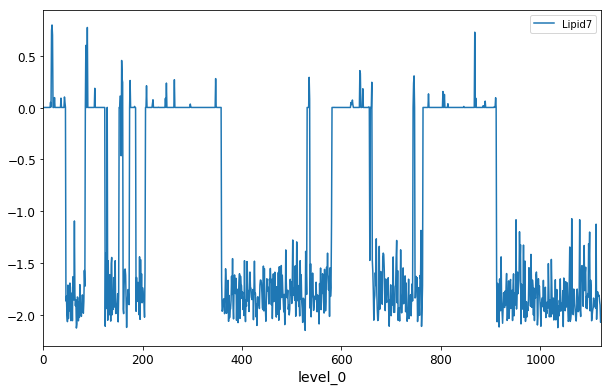

In [81]:
t373_super_narrow.drop("level_0", axis=1).reset_index(drop=True).reset_index().plot("level_0","Lipid7")

In [75]:
t373_narrow = t373_narrow.reset_index(drop=True)
t373_narrow["BiasedEnergy"] = t373_narrow["TotalE"] + 0.2*t373_narrow["AMH_4H"]

In [77]:
t373_narrow.sort_values("BiasedEnergy").head()

2186    0.002062
398     0.002075
20     -1.876488
988     0.002086
2261    0.002059
Name: Lipid1, dtype: float64

In [68]:
t373_super_narrow = t373_super_narrow.reset_index(drop=True)
t373_super_narrow["BiasedEnergy"] = t373_super_narrow["TotalE"] + 0.2*t373_super_narrow["AMH_4H"]

In [78]:
t373_super_narrow.query("Lipid1 < -0.5").sort_values("BiasedEnergy").head().to_csv("/Users/weilu/Research/data/selected.csv")

In [82]:
t373_super_narrow.query("Lipid1 < -0.5 and Lipid7 < -0.5").sort_values("BiasedEnergy").head()["Lipid1"]

Series([], Name: Lipid1, dtype: float64)

In [84]:
t373_narrow.query("Lipid1 < -0.5 and Lipid7 < -0.5").to_csv("/Users/weilu/Research/data/selected2.csv")

In [89]:
t373_narrow.sort_values("DisReal", ascending=False).head()

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy
946,286388,-179.816118,-436.125312,-245.541039,-305.695423,68.0,64.995160,26.508368,57.145418,-717.405939,...,1.520013,7.289126,-2.577021,-1.175693,-7.954141,-2.995597,-8.741945,-8.811388,-4.013220,-788.845781
546,221108,-201.469940,-407.854973,-266.116236,-308.453982,66.0,64.987222,24.206840,42.046223,-681.002588,...,1.198128,8.335522,-3.220784,-6.182657,-8.109057,-7.768108,-12.207467,-1.276039,-7.417777,-748.609091
532,220916,-203.006755,-414.495915,-261.079897,-304.069182,66.0,64.987207,24.529796,38.266241,-730.848119,...,1.328753,7.506422,-2.659843,-0.392917,-6.738003,-6.311969,-8.566641,-4.399358,-6.305643,-795.856419
351,131056,-175.660512,-399.364832,-241.721499,-297.085204,62.0,64.975605,33.820984,64.870234,-689.285927,...,1.030485,7.311189,-3.075666,-1.779076,-7.365427,-5.637872,-10.007806,-9.452039,-6.223536,-760.507156
2248,661197,-169.672965,-426.494537,-235.575945,-293.426529,64.0,64.974094,25.550759,-58.916889,-707.111669,...,0.918407,6.452709,-2.650790,-1.800819,-8.767094,-3.838908,-10.032964,-4.690880,-5.962602,-777.374805


In [85]:
t373_narrow.query("Lipid1 < -0.5 and Lipid7 < -0.5")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy
101,27117,-203.930506,-410.706077,-274.186428,-331.105482,76.0,64.897123,35.214455,37.688040,-685.391837,...,1.732591,9.798258,-2.963674,-0.805897,-7.900613,-0.682853,-9.747542,-6.584439,-14.803409,-756.022058
1184,307888,-195.630242,-435.155569,-256.611899,-309.100543,64.0,58.183612,19.117130,53.955815,-736.440977,...,1.423229,5.543619,-3.372721,-1.120181,-6.685898,-4.955295,-10.356982,-8.509524,-4.613997,-806.479888
1185,309158,-193.264620,-432.867410,-262.231255,-319.094199,64.0,58.600919,26.562725,-39.499154,-728.018780,...,2.024190,7.469871,-3.195907,-3.636113,-5.186055,-2.285889,-9.187340,-8.547995,-3.866942,-799.467778
1193,380116,-194.734815,-415.998650,-261.859307,-324.052138,76.0,64.182486,40.610641,41.699050,-727.524526,...,1.431345,6.697026,-3.216031,-1.079433,-7.731002,-5.865393,-9.799235,-5.988281,-16.944518,-798.934579
1194,380800,-184.085074,-395.333849,-253.502592,-304.337555,76.0,63.458593,43.401303,28.169537,-697.228949,...,2.309146,6.624908,-2.896678,-1.165570,-6.983405,-4.931913,-10.518770,-8.802494,-7.181036,-765.655801
1491,443746,-199.795756,-421.490782,-270.596935,-328.038519,80.0,64.888988,33.014588,22.832945,-756.243689,...,3.683204,9.512102,-3.225312,-1.372187,-4.244962,-1.137230,-7.634294,-9.893363,-12.793285,-826.553641


In [86]:
t373_super_narrow.query("Lipid1 < -0.5").sort_values("BiasedEnergy").head()

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy
10,21186,-209.133908,-418.951106,-270.329612,-313.703091,76.0,62.014634,25.631543,59.764704,-795.730168,...,0.650584,5.075778,-2.723255,-4.000245,-7.756103,-8.994198,-5.593929,-0.685517,-3.082913,-864.700700
783,581253,-201.116930,-413.832648,-258.702356,-304.689194,66.0,61.414392,26.005718,13.321524,-780.344135,...,1.375310,7.643183,-2.961339,-2.644498,-9.656189,-12.192673,-6.613459,-0.593869,-0.676587,-848.976545
304,226069,-203.865362,-414.742325,-264.843559,-309.038487,66.0,60.759228,25.615073,23.097784,-778.462800,...,1.499382,6.344030,-2.984441,-3.419661,-9.565722,-8.099691,-8.470239,-6.105927,-4.251687,-847.279984
227,221220,-200.730946,-410.319419,-261.402907,-306.431810,66.0,61.064203,18.522741,55.609889,-775.898991,...,1.371612,7.268464,-2.732144,-4.542499,-7.893796,-5.047760,-9.848075,-1.950217,-6.329883,-845.157923
871,587589,-194.713299,-408.114385,-258.357263,-303.285148,66.0,60.793929,25.228643,52.950716,-767.308158,...,1.764626,6.267082,-3.479249,-1.210820,-8.421729,-5.441395,-9.063197,-8.485487,-5.500987,-833.864010


In [ ]:
data.query("TempT == 373 and DisReal > 60 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5")

In [91]:
data.query("TempT == 373 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
690899,10899,-183.186433,-392.944653,-248.231963,-290.903219,84.0,62.765665,20.238180,4.321019,-722.852166,...,2.083610,1.751864,8.232831,-2.584027,-0.334311,-4.870930,-4.314226,-7.357321,-12.419326,-3.192265
690963,10963,-203.890243,-410.824289,-263.026350,-303.628052,84.0,62.684794,26.680936,8.449340,-726.347395,...,1.423125,1.197325,6.840901,-3.244232,-5.257919,-7.654789,-8.554059,-9.237917,-2.725016,-2.810763
700136,20136,-198.617280,-403.437657,-256.952363,-302.751807,76.0,62.154514,20.276552,57.604418,-671.685930,...,0.825889,1.288798,6.359311,-2.564478,-2.033408,-8.763024,-8.968270,-9.715095,-2.393667,-4.623440
700168,20168,-204.006668,-404.623421,-266.981801,-310.144555,76.0,61.471915,22.424513,47.543739,-705.466515,...,1.003719,0.931413,7.588703,-2.781509,-3.820230,-8.485840,-9.287819,-9.172349,-3.685424,-3.974061
700212,20212,-201.402359,-399.899319,-257.784101,-299.495533,76.0,60.809113,24.815046,60.198799,-670.265642,...,0.710009,1.259152,5.545050,-2.753711,-3.074379,-9.317066,-7.355665,-8.175493,-4.717142,-3.300249
700276,20276,-205.320118,-413.030582,-267.203097,-306.812533,76.0,61.589629,15.407709,61.199536,-707.336586,...,0.799255,0.998693,6.362230,-2.644398,-2.460090,-9.528058,-5.657994,-6.338014,-6.228574,-2.725754
700368,20368,-178.281697,-376.366721,-237.920124,-282.115608,76.0,62.458367,21.742777,60.658867,-678.643748,...,0.892182,2.258068,8.675508,-2.931965,-1.060059,-9.247739,-11.683983,-10.090947,-6.260215,-1.603898
700468,20468,-178.883857,-382.595805,-241.597731,-284.935977,76.0,59.233940,17.803061,58.321568,-677.582467,...,1.175440,2.489691,9.451321,-3.242794,-2.487269,-9.405203,-8.207869,-11.912090,-2.094131,-6.141665
701044,21044,-186.817382,-384.768943,-249.155596,-285.446440,76.0,62.912696,25.874808,62.743467,-704.606274,...,0.765338,0.958489,6.955008,-2.730942,-2.162102,-6.211948,-8.597890,-8.595427,-5.751583,-4.693169
701120,21120,-205.672390,-405.665475,-265.144647,-303.513149,76.0,59.118626,18.761977,59.019030,-736.470916,...,1.580592,1.107690,6.606527,-2.867801,-2.758255,-8.365926,-9.588418,-6.454264,-4.806064,-2.829348


In [95]:
data.query("TempT == 373 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5 and Lipid7 <  -0.5")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
719790,39790,-200.165415,-449.409061,-271.433191,-332.108513,72.0,50.788637,22.805240,41.767110,-738.455973,...,0.773651,1.059144,6.847160,-2.845979,-2.202658,-5.662142,-2.826926,-9.916290,-7.535219,-6.204875
719850,39850,-200.344851,-441.937429,-271.845396,-325.117365,72.0,52.241362,28.935426,44.313962,-725.821803,...,0.892460,1.538403,6.691036,-3.025566,-2.269948,-7.366669,-4.213091,-9.736521,-4.391394,-4.760685
719878,39878,-197.630924,-447.333869,-267.207378,-327.913469,72.0,51.357889,23.419343,36.659341,-756.478372,...,0.627075,1.902497,6.859819,-3.090808,-0.002232,-7.145503,-3.959742,-8.896298,-11.198955,-3.310982
719906,39906,-201.713781,-439.888574,-264.019739,-323.642670,72.0,51.514333,27.904597,7.737685,-738.121354,...,0.696223,1.522991,6.630852,-2.903002,-4.398953,-7.911909,-2.229540,-10.120626,-8.413158,-4.994734
719990,39990,-202.633308,-443.623278,-273.798239,-330.982823,72.0,54.114648,21.165653,20.712872,-771.843928,...,1.013205,0.857463,6.021266,-2.837612,-2.287464,-7.868649,-3.599279,-9.753709,-8.166509,-4.782810
726247,46247,-196.469346,-430.835950,-258.066898,-313.598979,54.0,51.711936,23.486991,43.789804,-750.340328,...,1.595918,1.521470,7.705958,-3.355514,-2.399803,-7.320083,-3.876052,-9.448349,-7.370891,-4.908992
727783,47783,-198.250640,-464.141351,-273.541379,-332.967664,54.0,50.104197,27.451390,-49.879270,-734.129925,...,0.707654,1.634080,7.552173,-3.328340,-2.251397,-6.992576,-4.644662,-10.234429,-5.786203,-4.981785
729643,49643,-195.036661,-444.638667,-267.339083,-327.218010,54.0,50.706115,23.106216,18.144648,-764.082002,...,0.615103,1.405312,6.485823,-3.144832,-0.739990,-7.564514,-4.175432,-9.858508,-7.854902,-5.889672
742860,62860,-194.089598,-443.905178,-268.759924,-328.402636,50.0,50.623890,28.301420,-50.589917,-720.442100,...,0.963211,1.831142,7.797881,-3.273377,-2.468980,-7.795293,-3.778621,-8.946783,-7.060067,-3.449528
750714,70714,-201.641860,-454.454174,-271.715113,-330.275092,56.0,50.787978,24.870885,-9.548726,-735.221627,...,0.830352,2.022193,6.719370,-3.390253,-2.627952,-6.171960,-4.163761,-9.712920,-8.098449,-4.235026


In [97]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5 and Lipid7 <  -0.5")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
705501,25501,-216.112719,-442.122646,-291.026235,-347.501318,76.0,62.647961,44.540263,61.763450,-836.562429,...,1.415303,3.163537,10.881090,-2.839091,1.001305,-5.652217,-3.721500,-8.175074,-5.209776,-13.531687
712055,32055,-209.110431,-474.873349,-285.046768,-347.584255,72.0,50.107109,22.905990,-18.148255,-872.040575,...,0.892242,1.314513,6.642784,-2.864897,-2.255518,-6.794366,-4.231318,-9.941246,-4.001791,-4.464314
712123,32123,-201.882750,-478.405363,-278.612081,-338.638506,72.0,50.713034,25.995547,-17.065924,-894.482517,...,0.668988,1.318091,6.655265,-2.562783,-2.618729,-6.824996,-2.391009,-9.096016,-6.743895,-4.326764
712363,32363,-196.528186,-458.403750,-263.834377,-324.781379,72.0,52.181114,26.092201,3.520444,-882.183331,...,1.086510,1.262166,6.403256,-3.379419,-3.151524,-5.827708,-3.837842,-10.443586,-5.977787,-4.931309
712383,32383,-202.834556,-460.954077,-277.790391,-336.045307,72.0,51.816568,28.404361,-1.511252,-885.045070,...,0.930861,1.677442,6.955258,-2.875876,-3.127862,-7.092646,-4.604151,-9.244971,-4.724257,-4.466391
712415,32415,-198.035807,-454.867104,-269.540361,-331.191978,72.0,52.909085,23.108023,-2.709018,-869.061721,...,0.888004,1.320995,5.735684,-2.571396,-2.995288,-6.597189,-1.935688,-9.273756,-6.871897,-4.481668
712443,32443,-213.297177,-478.836781,-287.252104,-351.757006,72.0,51.307761,27.186603,-41.458740,-868.874787,...,0.606321,1.571115,7.137922,-3.384934,-2.390039,-7.989829,-4.358318,-10.569474,-8.215844,-5.364211
712635,32635,-199.261592,-477.656795,-278.887136,-336.964914,72.0,51.389960,27.659903,-51.053635,-883.511477,...,0.736839,1.166374,6.038508,-3.271137,-3.263933,-7.987193,-3.020235,-9.773566,-7.199903,-4.537628
712655,32655,-202.938620,-474.258664,-280.132648,-340.848097,72.0,54.094165,26.075946,-53.957802,-907.282188,...,0.720345,1.337687,6.327291,-3.217493,-0.858811,-7.723681,-4.196795,-10.578383,-7.127138,-5.348803
712727,32727,-210.860842,-483.207946,-285.896993,-349.001349,72.0,50.142546,26.393601,-37.952584,-873.559742,...,0.863319,1.042734,5.992498,-2.773625,-4.400515,-7.530472,-2.636377,-9.168671,-4.331411,-4.120156


In [96]:
data.query("TempT == 373 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").shape

(2764, 50)

In [98]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").shape

(6754, 50)

In [ ]:
data.query("TempT == 373 and DisReal > 60 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").shape

# is what I want significant?

## lower bound 50 is kind of ok. about the same as native

In [104]:
t = data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5")
t = t.reset_index(drop=True)
t["BiasedEnergy"] = t["TotalE"] + 0.2*t["AMH_4H"]

In [106]:
t.sort_values("BiasedEnergy").head().to_csv("/Users/weilu/Research/data/selected_all.csv")

In [112]:
tt = t.sort_values("BiasedEnergy").drop("level_0", axis=1).reset_index(drop=True).reset_index()

In [122]:
tt.query("Qw < 0.5 and Qw > 0.4").to_csv("/Users/weilu/Research/data/constrain_qw.csv")

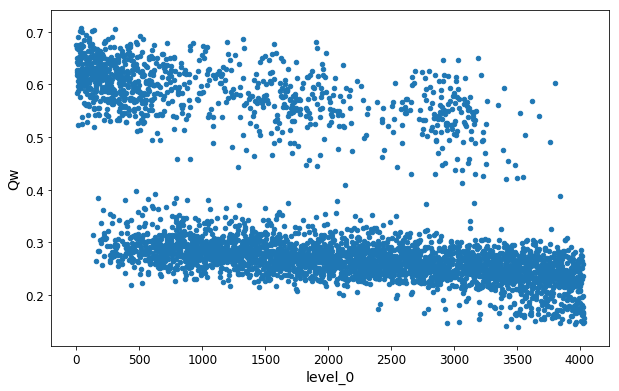

In [117]:
tt.plot.scatter("level_0", "Qw")

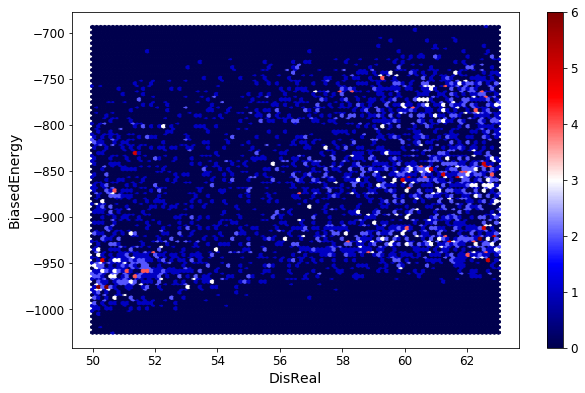

In [126]:
tt.plot.hexbin("DisReal", "BiasedEnergy", cmap="seismic", sharex=False)

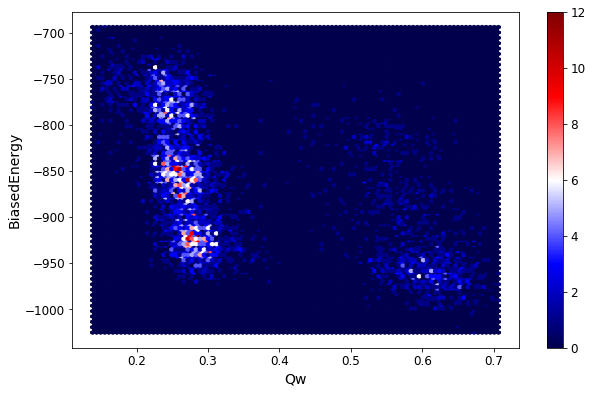

In [125]:
tt.plot.hexbin("Qw", "BiasedEnergy", cmap="seismic", sharex=False)

# Based on Qw is also about the same

In [132]:
tt.query("TempT == 373").query("Qw < 0.5 and Qw > 0.4")\
    .to_csv("/Users/weilu/Research/data/constrain_qw_temp.csv")

In [131]:
tt.query("TempT == 373").query("Qw < 0.5 and Qw > 0.4").sort_values("DisReal")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy
3762,3762,-192.104617,-432.101557,-253.422250,-314.241610,60.0,50.012939,26.367561,40.206246,-683.583976,...,0.894607,6.050583,-3.087847,-3.102997,-7.965673,-5.087159,-10.899809,-5.492458,-6.760871,-756.436435
3481,3481,-196.011497,-426.625812,-255.474504,-311.813975,50.0,50.516714,28.010989,27.223156,-706.016586,...,1.391637,6.549280,-2.945832,-3.367906,-8.306703,-5.658531,-10.018248,-1.869354,-5.118978,-776.540971
3068,3068,-193.807835,-444.256472,-264.910251,-326.597502,62.0,50.529089,23.796452,50.525372,-732.839541,...,1.290359,6.767304,-2.512858,-0.977001,-6.081578,-3.712467,-11.453116,-4.195051,-5.340472,-806.083375
3228,3228,-190.181418,-436.068786,-263.456637,-317.231977,52.0,50.668621,28.491077,17.558503,-720.496457,...,1.340836,6.851482,-2.620015,-1.057355,-8.376747,-2.716558,-8.917654,-5.413605,-4.617434,-792.264722
3498,3498,-191.417784,-440.037684,-256.510969,-313.163768,64.0,50.678416,27.946408,-40.103463,-703.603857,...,1.228067,6.738715,-2.511569,-0.170443,-7.787214,-4.574718,-9.987960,-8.524303,-6.302716,-775.410661
2903,2903,-203.836127,-445.618693,-276.351334,-333.831674,58.0,50.909585,33.183624,50.204235,-744.846772,...,1.965327,7.075568,-2.986687,0.005305,-6.390884,-3.507941,-9.379979,-10.576380,-4.825714,-820.728653
2930,2930,-204.417779,-442.174328,-277.635628,-333.484835,60.0,50.928444,32.604850,-46.833264,-743.557620,...,1.637943,6.962802,-3.076495,-3.262567,-7.645491,-5.849649,-11.154881,-3.855719,-8.013397,-818.577809
3244,3244,-193.363828,-428.314917,-260.948997,-315.756406,54.0,51.131521,25.275756,22.250747,-718.438630,...,1.354523,6.001116,-2.643060,0.539037,-6.971980,-6.641535,-11.133095,-3.268829,-6.755621,-791.186962
3551,3551,-186.901870,-416.216919,-253.149599,-305.404728,60.0,51.490177,25.847866,3.248905,-701.577611,...,1.533020,6.762323,-2.746508,-2.682997,-5.874521,-3.351435,-10.457261,-9.276889,-5.002982,-772.201456
2870,2870,-196.469346,-430.835950,-258.066898,-313.598979,54.0,51.711936,23.486991,43.789804,-750.340328,...,1.521470,7.705958,-3.355514,-2.399803,-7.320083,-3.876052,-9.448349,-7.370891,-4.908992,-823.190003


# base on energy

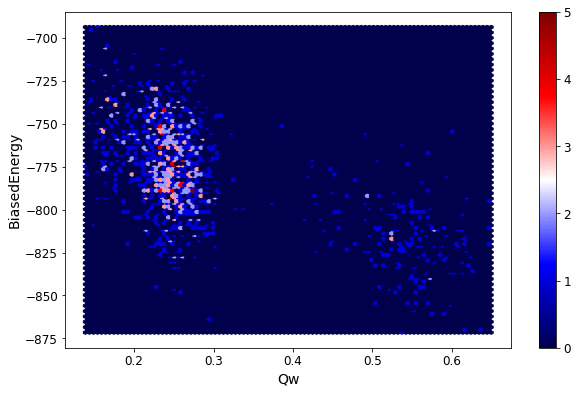

In [135]:
t.query("TempT == 373").plot.hexbin("Qw", "BiasedEnergy", cmap="seismic", sharex=False)

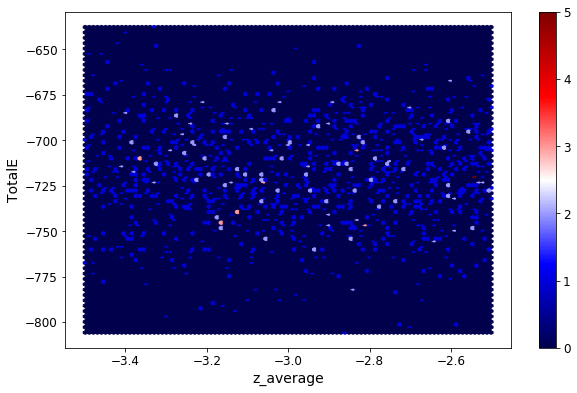

In [139]:
t.query("TempT == 373").plot.hexbin("z_average", "TotalE", cmap="seismic", sharex=False)

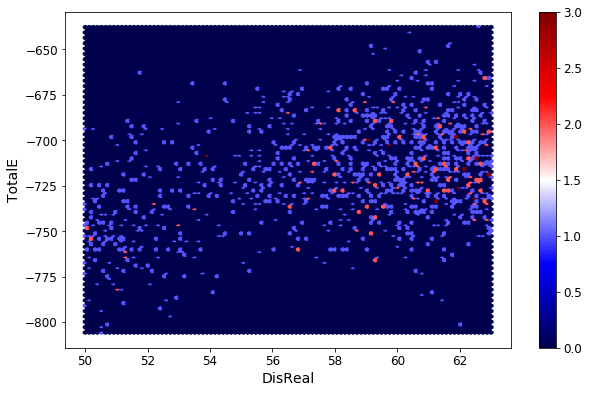

In [138]:
t.query("TempT == 373").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

In [ ]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5").to_csv("/Users/weilu/Research/data/selected_all.csv")

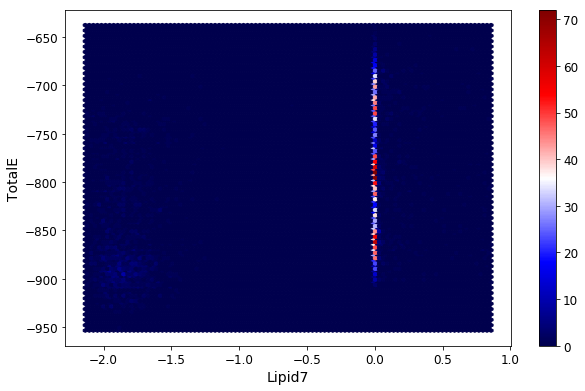

In [99]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5").plot.hexbin("Lipid7", "TotalE", cmap="seismic", sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a174053c8>]], dtype=object)

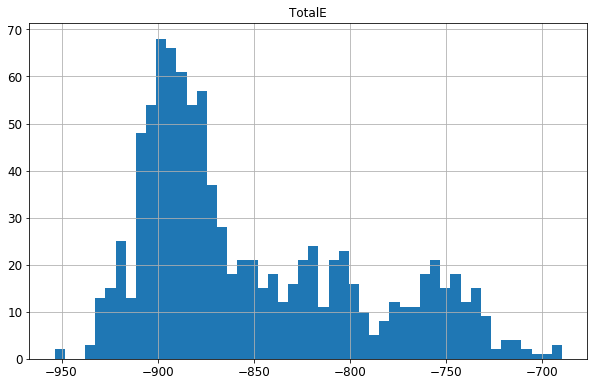

In [101]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5 and Lipid7 <  -0.5").hist("TotalE",bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a197a4e48>]], dtype=object)

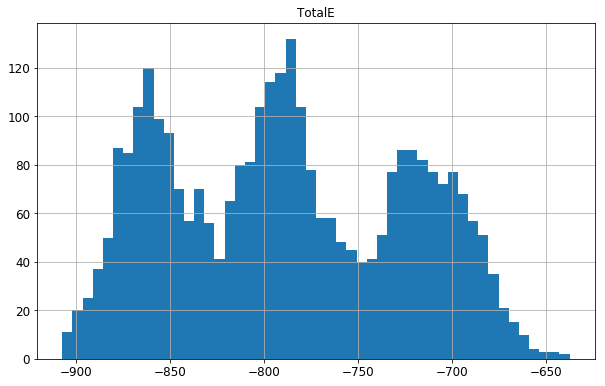

In [102]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5 and Lipid7 >  -0.5").hist("TotalE",bins=50)

In [29]:
sample = t373_narrow.sample(5).reset_index(drop=True)

In [43]:
rerun = (sample["Step"] // 2e7).astype(int)

In [ ]:
((sample["Step"] - 2e7*rerun)/4000).astype("int")

In [46]:
(sample["Step"] % 2e7)/4000

0    2009.0
1     105.0
2    4964.0
3    2068.0
4    4465.0
Name: Step, dtype: float64

In [32]:
sample["Step"]

0    68036000
1    60420000
2    79856000
3    68272000
4    77860000
Name: Step, dtype: int64

In [30]:
sample["Run"]

0    1
1    1
2    3
3    5
4    1
Name: Run, dtype: int64

In [ ]:
cmd_pre = "python2 ~/opt/script/BuildAllAtomsFromLammps.py"
location_pre = "/Users/weilu/Research/server/apr_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/simulation"
# cmd = cmd_pre + " " + location + " structure_2 4080 -seq ~/opt/pulling/2xov.seq"
# tt = pd.read_csv("/Users/weilu/Research/server/barrier.csv", index_col=0)
# tt = pd.read_csv("/Users/weilu/Research/server/high_go.csv", index_col=0)
tt = pd.read_csv("/Users/weilu/Research/server/rerun3.csv", index_col=0)
# rerun = 1
sample = tt.sample(5).reset_index(drop=True)
# sample["Frame"] = ((sample["Step"] - 2e7*rerun)/4000).astype("int")
sample["rerun"] = (sample["Step"] // 2e7).astype(int)
sample["Frame"] = ((sample["Step"] % 2e7)/4000).astype("int")
for index, row in sample.iterrows():
    BiasTo = row["BiasTo"]
    Run = row["Run"]
    Frame = row["Frame"]
    rerun = row["rerun"]
    print(BiasTo, Run, Frame)

    location = location_pre + f"/dis_{BiasTo}/{rerun}/dump.lammpstrj.{int(Run)}"
    cmd = cmd_pre + " " + location + f" structure_{index} {int(Frame)} -seq ~/opt/pulling/2xov.seq"
    print(cmd)
    do(cmd)